In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import numpy as np
import pickle 
import warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import nltk 
# from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
# from nltk.stem import PorterStemmer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df_orig = pd.read_csv("Hotel_Food_Reviews.csv")

In [3]:
print(df_orig.shape)
df_orig.head()

(962, 5)


,city,name,ratings,review_date,review_text
0,Ho,KCS Downtown,3,4 weeks ago,The place was okay. Nice food and all. Not too...
1,Ho,KCS Downtown,1,a month ago,KCS is a spot at the center of Ho in the Mal...
2,Ho,KCS Downtown,4,4 months ago,It's good for outing. You can go there with yo...
3,Ho,KCS Downtown,2,2 months ago,We ordered a large supreme pizza and it was mo...
4,Ho,KCS Downtown,4,2 weeks ago,Good food...but need to treat customers better


In [4]:
df_orig.city.value_counts()

Accra       193
Kumasi      153
Takoradi    148
Tamale      132
Tachiman    121
Ho          118
Sunyani      97
Name: city, dtype: int64

In [5]:
pd.set_option('max_colwidth', 1000)
pd.options.display.max_rows = 500

# Create a doc id for merging the results back to the original file 
df_orig.insert(0, 'Doc_Id', range(0, 0 + len(df_orig)))
df_orig.head()

,Doc_Id,city,name,ratings,review_date,review_text
0,0,Ho,KCS Downtown,3,4 weeks ago,"The place was okay. Nice food and all. Not too exquisite, just a casual place for a hungry stomach. Oh and if you love to eat under the sky and feel the cool breeze, that's for you! 😋😋"
1,1,Ho,KCS Downtown,1,a month ago,"KCS is a spot at the center of Ho in the Mall with offices and stores like fashion shops, mobile phone shops and a computer center. The spot is on ground floor of the building. It's a very popular spot both blacks and whites."
2,2,Ho,KCS Downtown,4,4 months ago,It's good for outing. You can go there with your spouse. I love the place...
3,3,Ho,KCS Downtown,2,2 months ago,We ordered a large supreme pizza and it was mostly chicken sausage on it. The crust was also thin which I did not enjoy.\nThe servers a friendly and service is prompt
4,4,Ho,KCS Downtown,4,2 weeks ago,Good food...but need to treat customers better


In [6]:
df = df_orig.loc[:,['review_text','Doc_Id']]

In [7]:
# Get the word count for each document
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split(" ")))
df.head()

,review_text,Doc_Id,word_count
0,"The place was okay. Nice food and all. Not too exquisite, just a casual place for a hungry stomach. Oh and if you love to eat under the sky and feel the cool breeze, that's for you! 😋😋",0,38
1,"KCS is a spot at the center of Ho in the Mall with offices and stores like fashion shops, mobile phone shops and a computer center. The spot is on ground floor of the building. It's a very popular spot both blacks and whites.",1,46
2,It's good for outing. You can go there with your spouse. I love the place...,2,16
3,We ordered a large supreme pizza and it was mostly chicken sausage on it. The crust was also thin which I did not enjoy.\nThe servers a friendly and service is prompt,3,31
4,Good food...but need to treat customers better,4,7


In [8]:
# Summary statistics
df.word_count.describe()

count    962.000000
mean      19.908524
std       27.280482
min        1.000000
25%        5.000000
50%       10.000000
75%       24.000000
max      244.000000
Name: word_count, dtype: float64

In [9]:
df1= df[df['word_count']==1]

In [10]:
df1.shape

(34, 3)

In [11]:
df1

,review_text,Doc_Id,word_count
5,Cool,5,1
12,Nice,12,1
71,Great,71,1
74,J'adore,74,1
79,Lush!,79,1
87,Good,87,1
135,Quiet,135,1
355,Excellent,355,1
494,Poor,494,1
499,Cool,499,1


In [12]:
# Top 20 most frequent words
freq = pd.Series(' '.join(df['review_text']).split()).value_counts()[:20]
freq

and      754
the      676
to       493
a        491
is       357
place    322
for      246
I        243
of       243
in       235
The      234
was      179
very     176
with     160
you      144
good     139
are      136
nice     133
have     128
food     119
dtype: int64

In [13]:
# Work with only nouns
def nouns(text):
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [14]:

df['data_nouns'] = pd.DataFrame(df.review_text.apply(nouns))
df.head()

,review_text,Doc_Id,word_count,data_nouns
0,"The place was okay. Nice food and all. Not too exquisite, just a casual place for a hungry stomach. Oh and if you love to eat under the sky and feel the cool breeze, that's for you! 😋😋",0,38,place Nice food place stomach sky cool breeze
1,"KCS is a spot at the center of Ho in the Mall with offices and stores like fashion shops, mobile phone shops and a computer center. The spot is on ground floor of the building. It's a very popular spot both blacks and whites.",1,46,KCS spot center Ho Mall offices stores fashion shops phone shops computer center spot ground floor building spot blacks whites
2,It's good for outing. You can go there with your spouse. I love the place...,2,16,spouse place
3,We ordered a large supreme pizza and it was mostly chicken sausage on it. The crust was also thin which I did not enjoy.\nThe servers a friendly and service is prompt,3,31,supreme pizza sausage crust servers service
4,Good food...but need to treat customers better,4,7,food customers


In [15]:
# Further cleaning, removing stopwords, lemmatizing
import re
temp =[]
my_stop_words = text.ENGLISH_STOP_WORDS

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for sentence in df['data_nouns']:
    sentence = sentence.lower()
    cleaner = re.compile('<.*?>')
    sentence = re.sub(cleaner, ' ', sentence)  # Remove html tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence) # removing puntuations
    
    words = [lemmatizer.lemmatize(word) for word in sentence.split() if word not in my_stop_words] # removing stopwords and lemm
    temp.append(words)
    
final_X = temp

In [16]:
final_X[:2]

[['place', 'nice', 'food', 'place', 'stomach', 'sky', 'cool', 'breeze'],
 ['kc',
  'spot',
  'center',
  'ho',
  'mall',
  'office',
  'store',
  'fashion',
  'shop',
  'phone',
  'shop',
  'computer',
  'center',
  'spot',
  'ground',
  'floor',
  'building',
  'spot',
  'black',
  'white']]

In [17]:
sent = []
for row in final_X:
    sequ = ''
    for word in row:
        sequ = sequ + ' ' + word
    sent.append(sequ)
final_X = sent

In [18]:
# remove unwanted characters, numbers and symbols 
df['cleaned'] = final_X
df.head()

,review_text,Doc_Id,word_count,data_nouns,cleaned
0,"The place was okay. Nice food and all. Not too exquisite, just a casual place for a hungry stomach. Oh and if you love to eat under the sky and feel the cool breeze, that's for you! 😋😋",0,38,place Nice food place stomach sky cool breeze,place nice food place stomach sky cool breeze
1,"KCS is a spot at the center of Ho in the Mall with offices and stores like fashion shops, mobile phone shops and a computer center. The spot is on ground floor of the building. It's a very popular spot both blacks and whites.",1,46,KCS spot center Ho Mall offices stores fashion shops phone shops computer center spot ground floor building spot blacks whites,kc spot center ho mall office store fashion shop phone shop computer center spot ground floor building spot black white
2,It's good for outing. You can go there with your spouse. I love the place...,2,16,spouse place,spouse place
3,We ordered a large supreme pizza and it was mostly chicken sausage on it. The crust was also thin which I did not enjoy.\nThe servers a friendly and service is prompt,3,31,supreme pizza sausage crust servers service,supreme pizza sausage crust server service
4,Good food...but need to treat customers better,4,7,food customers,food customer


In [19]:
# let us see the top 20 again after cleaning
freq_NN = pd.Series(' '.join(df['cleaned']).split()).value_counts()[:20]
freq_NN

place          383
food           191
hotel          183
room           145
service        144
staff          109
environment     76
restaurant      74
customer        62
nice            61
bar             50
meal            48
great           48
facility        44
pool            41
view            39
time            38
ghana           37
night           33
home            31
dtype: int64

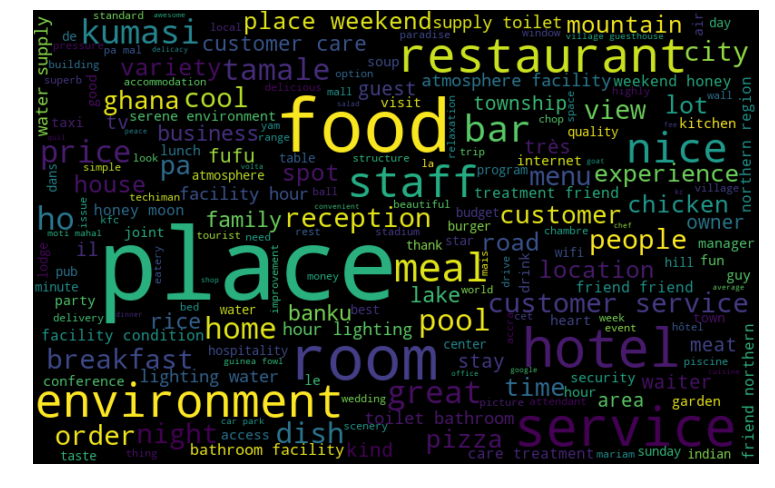

In [20]:
#Wordcloud

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(df['cleaned'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('wordcloud')

In [21]:
#Use CountVectorizer to get bigrams to visualize
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df = 0.95, min_df = 2, stop_words= 'english', max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(df['cleaned'])

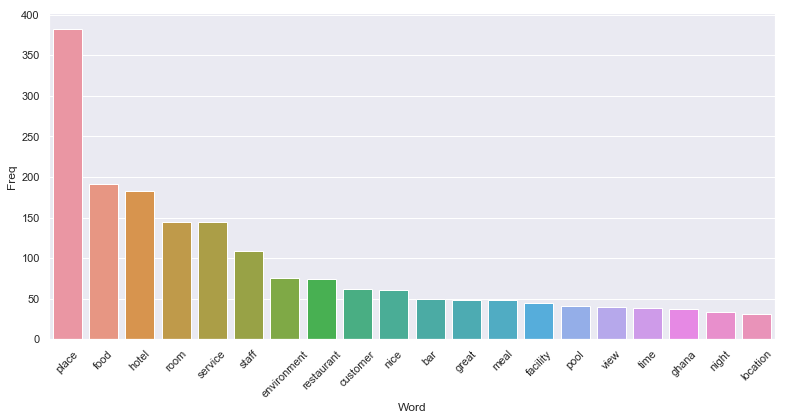

In [22]:
# Most frequently occuring words
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer().fit(df['cleaned'])
    bag_of_words=vec.transform(df['cleaned'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Convert most freq words to datafame for visuals

top_words = get_top_n_words(df['cleaned'], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ['Word', 'Freq']

# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
g = sns.barplot(x='Word', y='Freq', data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
fig = g.get_figure()
fig.savefig("sns_output.png")

                  Bi-gram  Freq
0        customer service    25
1           place weekend    15
2              place food    13
3            food service    11
4             place staff     9
5               home home     9
6        nice environment     9
7          hotel customer     9
8           customer care     9
9              food place     8
10            hotel staff     7
11           service food     7
12             food staff     7
13            place rooms     7
14  atmosphere facilities     7
15        facilities hour     7
16          hour lighting     7
17         lighting water     7
18           water supply     7
19        toilet bathroom     7


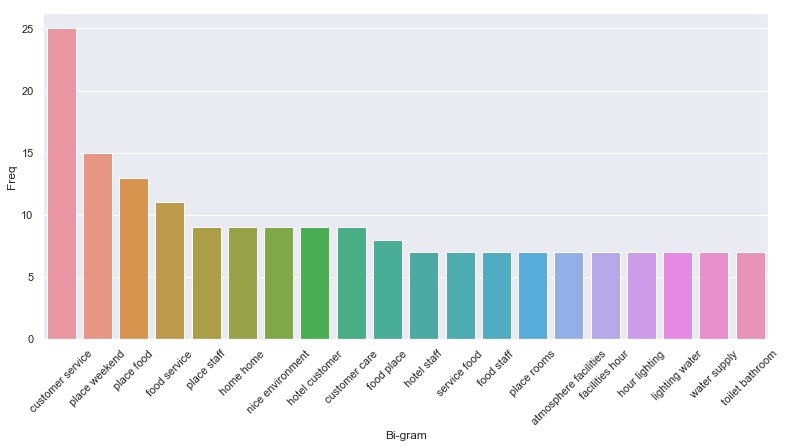

In [23]:
# Most frequently Co-occuring words
def get_top_n2_words(corpus,n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(df['data_nouns'])
    bag_of_words=vec1.transform(df['data_nouns'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Convert most freq words to datafame for visuals

top2_words = get_top_n2_words(df['data_nouns'], n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ['Bi-gram', 'Freq']

# for bigram wordcloud
top100_words = get_top_n2_words(df['data_nouns'], n=100)
top100_df = pd.DataFrame(top100_words)
top100_df.columns = ['Bi-gram', 'Freq']
print(top2_df)

# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
h = sns.barplot(x='Bi-gram', y='Freq', data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
fig = h.get_figure()
fig.savefig("sns_output_bigrams.png")

In [24]:
top100_df['Bi_gram'] = top100_df['Bi-gram'].str.replace(' ','_')
top100_df.head()

,Bi-gram,Freq,Bi_gram
0,customer service,25,customer_service
1,place weekend,15,place_weekend
2,place food,13,place_food
3,food service,11,food_service
4,place staff,9,place_staff


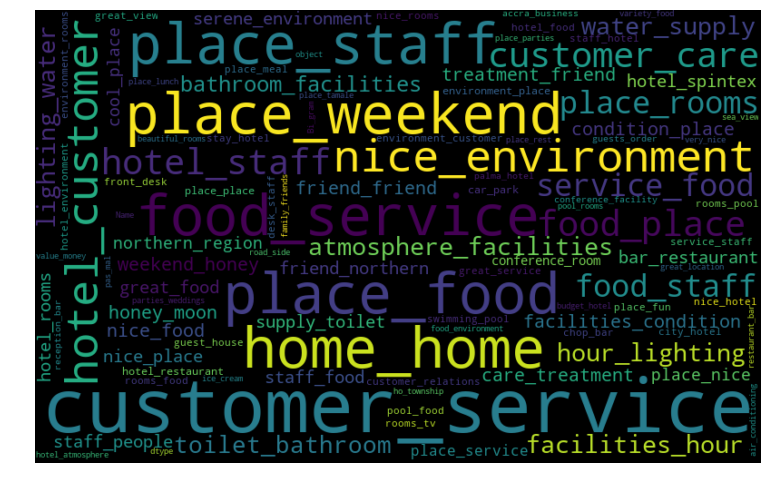

In [25]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(top100_df['Bi_gram'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('wordcloud_bigram')

### Term vectorization term weighting:
- The usefulness of the document-term matrix can be improved by assigning higher weights to important terms. This helps to include or exclude terms that will enter the model.
- TF-IDF is a common way of giving weights to terms in a document.
- Term Frequency - TF is the number of times a term appears in a document.
- Inverse Document Frequency - IDF is the total number of documents that have a term. This penalises common terms that appear in almost every document.

In [26]:
no_features = 10000

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words= 'english', max_features=no_features, ngram_range=(1,1),
                                  analyzer='word')
tfidf = tfidf_vectorizer.fit_transform(df['cleaned'])
# get the feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [28]:
print('Vocabulary has %d distinct terms' % len(tfidf_feature_names))

Vocabulary has 594 distinct terms


### The terms with the highest TF-IDF scores across all documents in the document-term matrix.

In [29]:
import operator
def rank_terms( tfidf, tfidf_feature_names ):
    # get the sums over each column
    sums = tfidf.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(tfidf_feature_names):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [30]:
ranking = rank_terms(tfidf, tfidf_feature_names)
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.0f)" % ( i+1, pair[0], pair[1] ) )

01. place (160)
02. food (62)
03. service (48)
04. hotel (38)
05. room (37)
06. nice (34)
07. environment (33)
08. staff (30)
09. meal (23)
10. customer (21)
11. great (21)
12. restaurant (20)
13. home (15)
14. cool (15)
15. pool (14)
16. bar (13)
17. view (12)
18. time (12)
19. serene (11)
20. dish (11)


# Sentiment Analysis using textblob

In [31]:
from textblob import TextBlob

In [32]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [33]:
df_orig['polarity'] = df_orig['review_text'].apply(pol)
df_orig['subjectivity'] = df_orig['review_text'].apply(sub)
df_orig.head()

,Doc_Id,city,name,ratings,review_date,review_text,polarity,subjectivity
0,0,Ho,KCS Downtown,3,4 weeks ago,"The place was okay. Nice food and all. Not too exquisite, just a casual place for a hungry stomach. Oh and if you love to eat under the sky and feel the cool breeze, that's for you! 😋😋",0.422917,0.769444
1,1,Ho,KCS Downtown,1,a month ago,"KCS is a spot at the center of Ho in the Mall with offices and stores like fashion shops, mobile phone shops and a computer center. The spot is on ground floor of the building. It's a very popular spot both blacks and whites.",0.193333,0.400000
2,2,Ho,KCS Downtown,4,4 months ago,It's good for outing. You can go there with your spouse. I love the place...,0.600000,0.600000
3,3,Ho,KCS Downtown,2,2 months ago,We ordered a large supreme pizza and it was mostly chicken sausage on it. The crust was also thin which I did not enjoy.\nThe servers a friendly and service is prompt,-0.122143,0.645714
4,4,Ho,KCS Downtown,4,2 weeks ago,Good food...but need to treat customers better,0.600000,0.550000


In [34]:
def func(x):
    if x > 0.0:
        return "Positive"
    else:
        return "Negative"
    
df_orig['Sentiment'] = df_orig['polarity'].apply(func)
df_orig.head()

,Doc_Id,city,name,ratings,review_date,review_text,polarity,subjectivity,Sentiment
0,0,Ho,KCS Downtown,3,4 weeks ago,"The place was okay. Nice food and all. Not too exquisite, just a casual place for a hungry stomach. Oh and if you love to eat under the sky and feel the cool breeze, that's for you! 😋😋",0.422917,0.769444,Positive
1,1,Ho,KCS Downtown,1,a month ago,"KCS is a spot at the center of Ho in the Mall with offices and stores like fashion shops, mobile phone shops and a computer center. The spot is on ground floor of the building. It's a very popular spot both blacks and whites.",0.193333,0.400000,Positive
2,2,Ho,KCS Downtown,4,4 months ago,It's good for outing. You can go there with your spouse. I love the place...,0.600000,0.600000,Positive
3,3,Ho,KCS Downtown,2,2 months ago,We ordered a large supreme pizza and it was mostly chicken sausage on it. The crust was also thin which I did not enjoy.\nThe servers a friendly and service is prompt,-0.122143,0.645714,Negative
4,4,Ho,KCS Downtown,4,2 weeks ago,Good food...but need to treat customers better,0.600000,0.550000,Positive


In [54]:
print(df_orig[df_orig['Sentiment']== 'Positive'].shape)
df_orig[df_orig['Sentiment']== 'Positive'].head(50)

(820, 9)


,Doc_Id,city,name,ratings,review_date,review_text,polarity,subjectivity,Sentiment
0,0,Ho,KCS Downtown,3,4 weeks ago,"The place was okay. Nice food and all. Not too exquisite, just a casual place for a hungry stomach. Oh and if you love to eat under the sky and feel the cool breeze, that's for you! 😋😋",0.422917,0.769444,Positive
1,1,Ho,KCS Downtown,1,a month ago,"KCS is a spot at the center of Ho in the Mall with offices and stores like fashion shops, mobile phone shops and a computer center. The spot is on ground floor of the building. It's a very popular spot both blacks and whites.",0.193333,0.400000,Positive
2,2,Ho,KCS Downtown,4,4 months ago,It's good for outing. You can go there with your spouse. I love the place...,0.600000,0.600000,Positive
4,4,Ho,KCS Downtown,4,2 weeks ago,Good food...but need to treat customers better,0.600000,0.550000,Positive
5,5,Ho,YAKA YALÉ (Bar Restau),3,8 months ago,Cool,0.350000,0.650000,Positive
8,8,Ho,Prisons Canteen,4,3 weeks ago,Good food always available from Mondays to Fridays,0.550000,0.500000,Positive
9,9,Ho,Prisons Canteen,3,2 months ago,"For your delicious fufu and Banku with soup, this is the right place in Ho.",0.642857,0.767857,Positive
10,10,Ho,Prisons Canteen,5,8 months ago,Very hospitable chefs. Highly recommended above average,0.052500,0.335000,Positive
11,11,Ho,Prisons Canteen,4,3 months ago,Every entertaining,0.500000,0.700000,Positive
12,12,Ho,Prisons Canteen,3,3 months ago,Nice,0.600000,1.000000,Positive


In [55]:
print(df_orig[df_orig['Sentiment']== 'Negative'].shape)
df_orig[df_orig['Sentiment']== 'Negative'].head(50)

(142, 9)


,Doc_Id,city,name,ratings,review_date,review_text,polarity,subjectivity,Sentiment
3,3,Ho,KCS Downtown,2,2 months ago,We ordered a large supreme pizza and it was mostly chicken sausage on it. The crust was also thin which I did not enjoy.\nThe servers a friendly and service is prompt,-0.122143,0.645714,Negative
6,6,Ho,YAKA YALÉ (Bar Restau),3,a month ago,"Pas mal, sauf qu'il reste encore un peu à faire...",0.000000,0.000000,Negative
7,7,Ho,YAKA YALÉ (Bar Restau),5,a year ago,J'ai adoré,0.000000,0.000000,Negative
18,18,Ho,Sylvia's Kitchen,5,a year ago,U get answer to ur Hungary belly,0.000000,0.000000,Negative
21,21,Ho,White House Bar & Restaurant,5,11 months ago,Serene environment for parties and weddings,0.000000,0.000000,Negative
37,37,Ho,Hillview Chop Bar,5,3 months ago,"For any dish made in Ghana, hillview is the place to go.",0.000000,0.000000,Negative
43,43,Ho,Mothers Inn Restaurant,2,a year ago,It has come down. Mother is no more there to take care of it. Place was not clean. Only thing available was fufu. TV too loud.,-0.014815,0.614815,Negative
46,46,Ho,Mama Ruth's Delicious Rice,3,a month ago,Too Much Queue Always... Make The Place Clumpsy And Boring.,-0.400000,0.600000,Negative
53,53,Ho,Lord Garden Restaurant,3,a year ago,A little,-0.187500,0.500000,Negative
69,69,Ho,Mountain Paradise Lodge,1,2 months ago,"Worst experience ever!!\n\nWe agreed with the manager to upgrade our room upon arrival against a fee. The manager kept us waiting for THREE LONG HOURS without a room before he offered us to stay in a tent!! \nAfter declining his offer and insisting put our luggage in the upgraded room l, we realized that he gave the upgraded room to other guests who had a wrong reservation.\n\nOn top of that, during the FOUR HOURS of waiting no one attended to us. \n\nThe manager was “courteous” enough to argue with us (with anger) that he is sticking to the original agreement and that he is giving us back the smaller room because we asked for a discount!! He didn’t even apologize or say it was a mistake.\n\nWe drove four hours from Accra to the hotel, waited for another four hours before we left. This guy wasted our vacation!!\n\nThank you Mountain Paradise Lodge for the poor service and lack professionalism.",-0.117188,0.480357,Negative


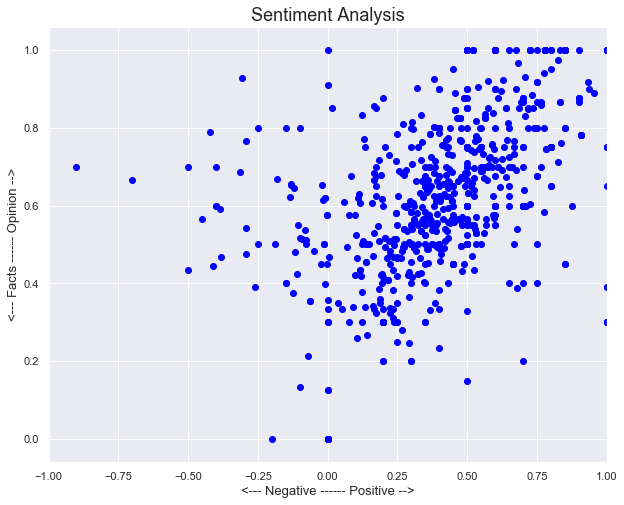

In [37]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, doc in enumerate(df_orig.index):
    x = df_orig.polarity.loc[doc]
    y = df_orig.subjectivity.loc[doc]
    plt.scatter(x,y, color = 'blue')
    plt.xlim(-1,1)
    
plt.title('Sentiment Analysis', fontsize = 18)
plt.xlabel('<--- Negative ------ Positive -->', fontsize = 13)
plt.ylabel('<--- Facts ------ Opinion -->', fontsize = 13)

plt.show()

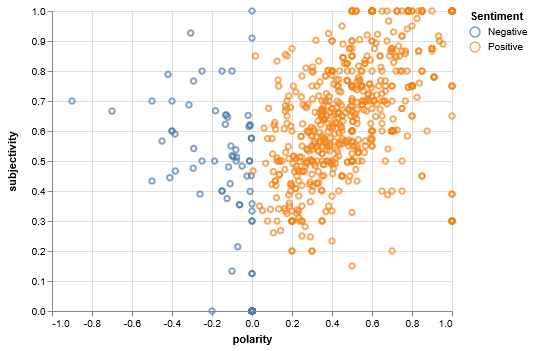

In [38]:
import altair as alt
alt.renderers.enable('jupyterlab')
alt.Chart(df_orig).mark_point().encode(
x= 'polarity:Q',
y= 'subjectivity:Q',
color = 'Sentiment:N')

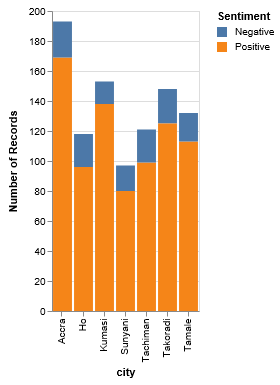

In [39]:
alt.Chart(df_orig).mark_bar().encode(
x= 'city:N',
y= 'count()',
color = 'Sentiment:N')